In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', False)

In [3]:
df=pd.read_csv('IPL_ball_by_ball.csv')
df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#MS Dhoni
df_msd=df[df['striker']=='MS Dhoni']
df_msd.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
556,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN
557,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1817,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.4,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df_msd_bef_Ret=df_msd[(df_msd['season']>=2018)& (df_msd['season']<=2019)]
df_msd_aft_Ret=df_msd[(df_msd['season']>=2020)& (df_msd['season']<=2021)]

In [6]:
#1. Runs scored before and after retirement
#2. Strike rate before and after retirement
#3. Where does Dhoni lie in the batting universe before and after retirement ?
#4. No of times getting dismissed before and after retirement
#5. No of boundaries before and after retirement

In [111]:
df.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [110]:
runs_bef_ret = df_msd_bef_Ret['runs_off_bat'].sum()
runs_bef_ret

871

In [109]:
runs_aft_ret=df_msd_aft_Ret['runs_off_bat'].sum()
runs_aft_ret

237

In [102]:
strike_rate_bef_ret= 100*(runs_bef_ret/len(df_msd_bef_Ret))
strike_rate_bef_ret

136.5203761755486

In [101]:
strike_rate_aft_ret=100*(runs_aft_ret/len(df_msd_aft_Ret))
strike_rate_aft_ret

114.4927536231884

In [103]:
df_bef_ret=df[(df['season']>=2018) & (df['season']<=2019)]
df_aft_ret=df[(df['season']>=2020) & (df['season']<=2021)]

In [104]:
total_dismissals_bef_ret=len(df_msd_bef_Ret[df_msd_bef_Ret['player_dismissed']=='MS Dhoni'])
total_dismissals_bef_ret

10

In [105]:
total_dismissals_aft_ret=len(df_msd_aft_Ret[df_msd_aft_Ret['player_dismissed']=='MS Dhoni'])
total_dismissals_aft_ret

11

In [114]:
boundaries_bef_ret=len(df_msd_bef_Ret[(df_msd_bef_Ret['runs_off_bat']==6)|(df_msd_bef_Ret['runs_off_bat']==4)])
boundaries_bef_ret

99

In [107]:
boundaries_aft_ret=len(df_msd_aft_Ret[(df_msd_aft_Ret['runs_off_bat']==6)|(df_msd_aft_Ret['runs_off_bat']==4)])
boundaries_aft_ret

28

In [115]:

df_batters_univ_bef_ret_balls_faced=pd.DataFrame(df_bef_ret.groupby('striker')['ball'].count())
df_batters_univ_bef_ret_balls_faced.head()

,ball
striker,
A Dananjaya,5
A Mishra,28
AB de Villiers,574
AD Hales,119
AD Nath,71


from matplotlib import pyplot as plt
_df_0['ball'].plot(kind='hist', bins=20, title='ball')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ball'].plot(kind='line', figsize=(8, 4), title='ball')
plt.gca().spines[['top', 'right']].set_visible(False)

In [116]:
df_batters_univ_bef_ret_runs_scored=pd.DataFrame(df_bef_ret.groupby('striker')['runs_off_bat'].sum())
df_batters_univ_bef_ret_runs_scored.head()

,runs_off_bat
striker,
A Dananjaya,4
A Mishra,22
AB de Villiers,922
AD Hales,148
AD Nath,70


In [117]:
df_batter_perf_univ_bfrt=pd.concat([df_batters_univ_bef_ret_balls_faced,pd.DataFrame(df_batters_univ_bef_ret_runs_scored['runs_off_bat'])],axis=1)
df_batter_perf_univ_bfrt.head()

,ball,runs_off_bat
striker,,
A Dananjaya,5,4
A Mishra,28,22
AB de Villiers,574,922
AD Hales,119,148
AD Nath,71,70


In [118]:
df_batter_perf_univ_bfrt.reset_index(inplace=True)

In [119]:
df_batter_perf_univ_bfrt.head()

,striker,ball,runs_off_bat
0,A Dananjaya,5,4
1,A Mishra,28,22
2,AB de Villiers,574,922
3,AD Hales,119,148
4,AD Nath,71,70


In [120]:
df_batter_perf_univ_bfrt['strike_rate']=100*(df_batter_perf_univ_bfrt['runs_off_bat']/df_batter_perf_univ_bfrt['ball'])
df_batter_perf_univ_bfrt.head()

,striker,ball,runs_off_bat,strike_rate
0,A Dananjaya,5,4,80.000000
1,A Mishra,28,22,78.571429
2,AB de Villiers,574,922,160.627178
3,AD Hales,119,148,124.369748
4,AD Nath,71,70,98.591549


In [121]:
df_batter_perf_univ_final_bfrt=df_batter_perf_univ_bfrt[df_batter_perf_univ_bfrt['ball']>=70]
df_batter_perf_univ_final_bfrt.head()

,striker,ball,runs_off_bat,strike_rate
2,AB de Villiers,574,922,160.627178
3,AD Hales,119,148,124.369748
4,AD Nath,71,70,98.591549
5,AD Russell,453,830,183.222958
6,AJ Finch,102,134,131.372549


In [122]:
df_batter_perf_univ_final_bfrt=df_batter_perf_univ_final_bfrt.sort_values('runs_off_bat',ascending=False)
df_batter_perf_univ_final_bfrt.head()

,striker,ball,runs_off_bat,strike_rate
78,KL Rahul,873,1252,143.413517
133,RR Pant,723,1178,162.932227
137,S Dhawan,770,1018,132.207792
167,V Kohli,717,994,138.633194
154,SR Watson,689,953,138.316401


In [123]:
df_batter_perf_univ_final_bfrt

,striker,ball,runs_off_bat,strike_rate
78,KL Rahul,873,1252,143.413517
133,RR Pant,723,1178,162.932227
137,S Dhawan,770,1018,132.207792
167,V Kohli,717,994,138.633194
154,SR Watson,689,953,138.316401
143,SA Yadav,718,936,130.362117
2,AB de Villiers,574,922,160.627178
28,CA Lynn,678,896,132.153392
81,KS Williamson,656,891,135.823171
13,AT Rayudu,717,884,123.291492


In [124]:
df_balls_faced_aft_ret=pd.DataFrame(df_aft_ret.groupby('striker')['ball'].count())
df_balls_faced_aft_ret.head()

,ball
striker,
A Nortje,6
AB de Villiers,425
AD Russell,194
AJ Finch,254
AJ Tye,7


In [125]:
df_runs_scored_aft_ret=pd.DataFrame(df_aft_ret.groupby('striker')['runs_off_bat'].sum())
df_runs_scored_aft_ret.head()

,runs_off_bat
striker,
A Nortje,7
AB de Villiers,667
AD Russell,280
AJ Finch,268
AJ Tye,6


In [126]:
df_batter_perf_aft_ret=pd.concat([df_balls_faced_aft_ret,pd.DataFrame(df_runs_scored_aft_ret['runs_off_bat'])],axis=1)
df_batter_perf_aft_ret.head()

,ball,runs_off_bat
striker,,
A Nortje,6,7
AB de Villiers,425,667
AD Russell,194,280
AJ Finch,254,268
AJ Tye,7,6


In [127]:
df_batter_perf_aft_ret['strike_rate']=100*(df_batter_perf_aft_ret['runs_off_bat']/df_batter_perf_aft_ret['ball'])
df_batter_perf_aft_ret.head()

,ball,runs_off_bat,strike_rate
striker,,,
A Nortje,6,7,116.666667
AB de Villiers,425,667,156.941176
AD Russell,194,280,144.329897
AJ Finch,254,268,105.511811
AJ Tye,7,6,85.714286


In [128]:
df_batter_univ_aft_ret=df_batter_perf_aft_ret[df_batter_perf_aft_ret['ball']>=70]
df_batter_univ_aft_ret.head()

,ball,runs_off_bat,strike_rate
striker,,,
AB de Villiers,425,667,156.941176
AD Russell,194,280,144.329897
AJ Finch,254,268,105.511811
AM Rahane,122,121,99.180328
AR Patel,90,117,130.000000


In [129]:
df_batter_univ_aft_ret.sort_values('runs_off_bat').reset_index(inplace=True)

In [130]:
df_batter_univ_aft_ret.head()

,ball,runs_off_bat,strike_rate
striker,,,
AB de Villiers,425,667,156.941176
AD Russell,194,280,144.329897
AJ Finch,254,268,105.511811
AM Rahane,122,121,99.180328
AR Patel,90,117,130.000000


In [131]:
df_batter_univ_aft_ret.reset_index(inplace=True)
df_batter_univ_aft_ret.head()

,striker,ball,runs_off_bat,strike_rate
0,AB de Villiers,425,667,156.941176
1,AD Russell,194,280,144.329897
2,AJ Finch,254,268,105.511811
3,AM Rahane,122,121,99.180328
4,AR Patel,90,117,130.000000


In [132]:
df_batter_univ_aft_ret=df_batter_univ_aft_ret.sort_values('runs_off_bat',ascending=False)
df_batter_univ_aft_ret

,striker,ball,runs_off_bat,strike_rate
26,KL Rahul,778,1007,129.434447
50,S Dhawan,724,998,137.845304
15,F du Plessis,553,769,139.059675
12,DA Warner,608,743,122.203947
30,MA Agarwal,472,692,146.610169
64,V Kohli,568,669,117.781690
10,D Padikkal,533,668,125.328330
0,AB de Villiers,425,667,156.941176
41,Q de Kock,502,661,131.673307
52,SA Yadav,463,653,141.036717


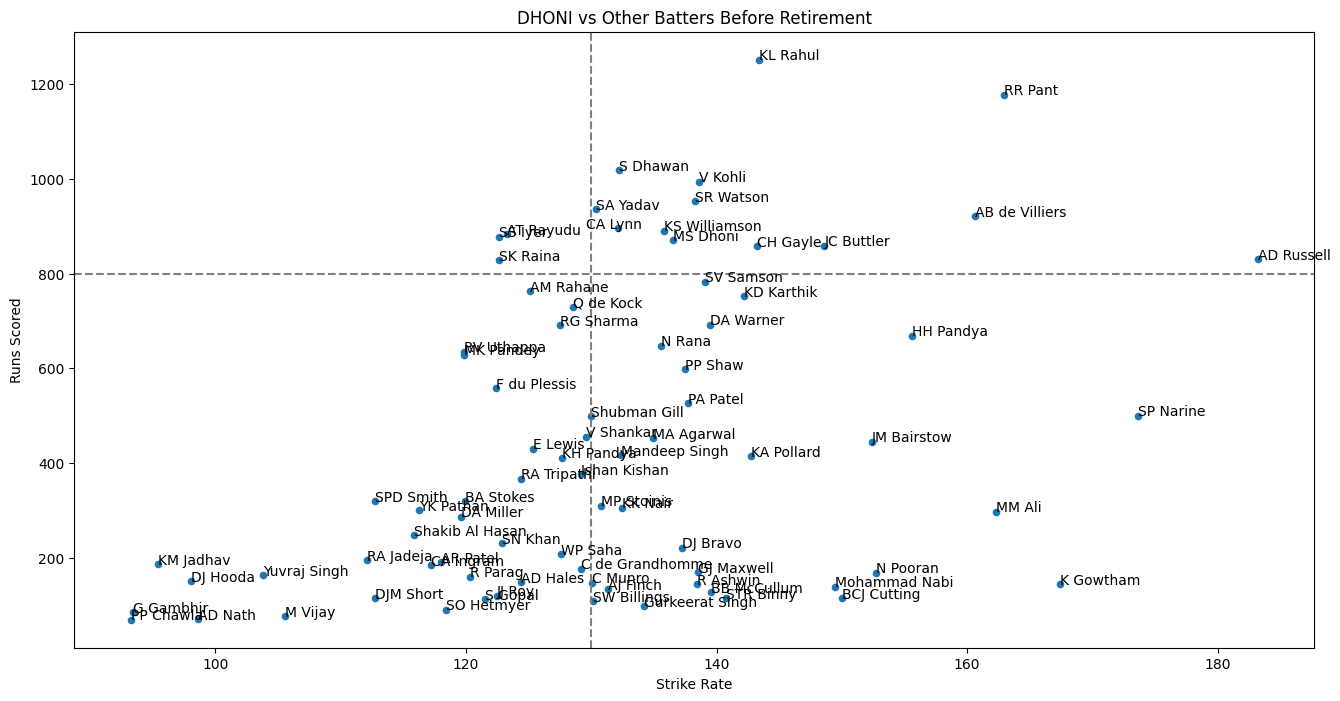

In [139]:
df_batter_perf_univ_final_bfrt.plot(kind='scatter',x='strike_rate',y='runs_off_bat',figsize=(16,8))
for i in range(len(df_batter_perf_univ_final_bfrt)):
   bfrt_strike_rate_list=list(df_batter_perf_univ_final_bfrt['strike_rate'])
   bfrt_runs_scored_list=list(df_batter_perf_univ_final_bfrt['runs_off_bat'])
   bfrt_striker_list=list(df_batter_perf_univ_final_bfrt['striker'])
   if(bfrt_striker_list[i]=='MS Dhoni'):
    plt.text(bfrt_strike_rate_list[i],bfrt_runs_scored_list[i]-1.2,bfrt_striker_list[i])

   elif(bfrt_striker_list[i]=='CA Lynn'):
    plt.text(bfrt_strike_rate_list[i]-2.6,bfrt_runs_scored_list[i],bfrt_striker_list[i])

   else:
    plt.text(bfrt_strike_rate_list[i],bfrt_runs_scored_list[i],bfrt_striker_list[i])

plt.axvline(130,ls='--', color='grey')
plt.axhline(800,ls='--',color='grey')
plt.title("DHONI vs Other Batters Before Retirement")
plt.xlabel('Strike Rate')
plt.ylabel('Runs Scored')
plt.show()

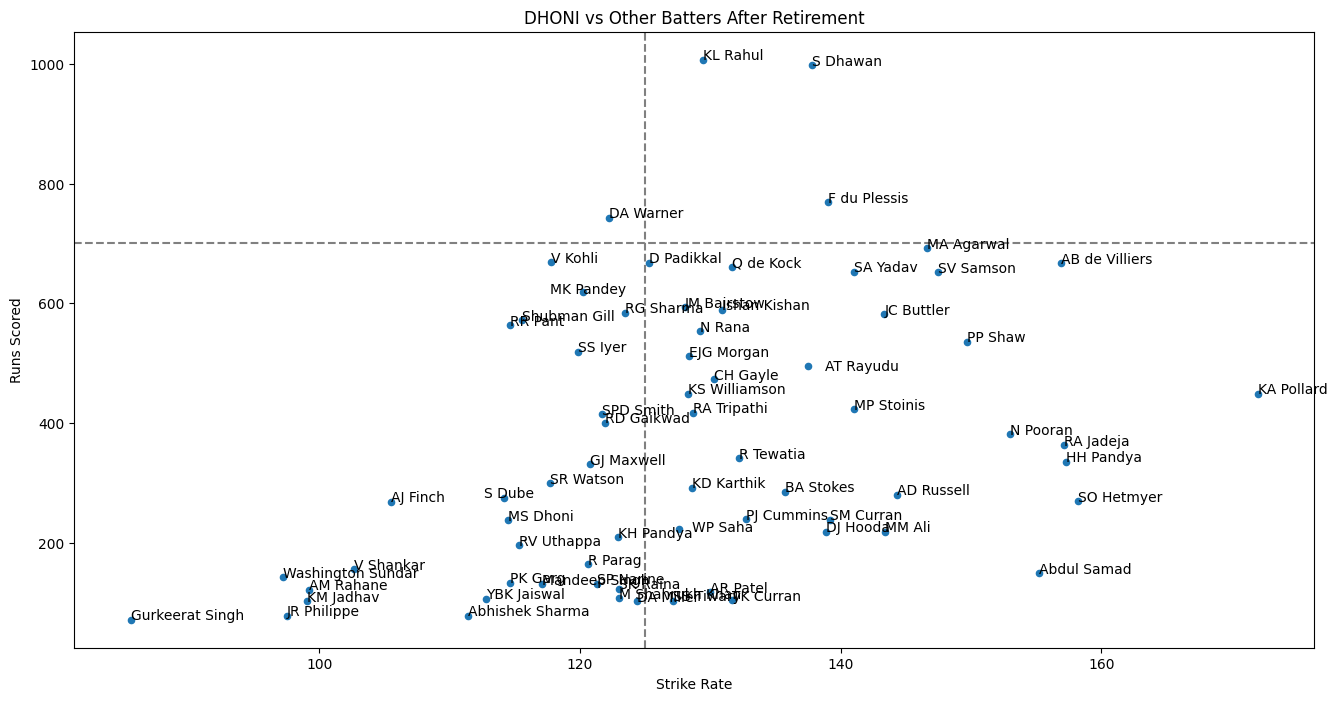

In [135]:
df_batter_univ_aft_ret.plot(kind='scatter',x='strike_rate',y='runs_off_bat',figsize=(16,8))
for i in range(len(df_batter_univ_aft_ret)):
   afrt_strike_rate_list=list(df_batter_univ_aft_ret['strike_rate'])
   afrt_runs_scored_list=list(df_batter_univ_aft_ret['runs_off_bat'])
   afrt_striker_list=list(df_batter_univ_aft_ret['striker'])
   if(afrt_striker_list[i]=='MK Pandey'):
    plt.text(afrt_strike_rate_list[i]-2.5,afrt_runs_scored_list[i]-1.2,afrt_striker_list[i])

   elif(afrt_striker_list[i]=='AT Rayudu'):
    plt.text(afrt_strike_rate_list[i]+1.3,afrt_runs_scored_list[i]-6.5,afrt_striker_list[i])

   elif(afrt_striker_list[i]=='S Dube'):
    plt.text(afrt_strike_rate_list[i]-1.5,afrt_runs_scored_list[i]+1.5,afrt_striker_list[i])

   elif(afrt_striker_list[i]=='WP Saha'):
    plt.text(afrt_strike_rate_list[i]+1,afrt_runs_scored_list[i]-3.8,afrt_striker_list[i])

   else:
    plt.text(afrt_strike_rate_list[i],afrt_runs_scored_list[i],afrt_striker_list[i])

plt.axvline(125,ls='--', color='grey')
plt.axhline(700,ls='--',color='grey')
plt.title("DHONI vs Other Batters After Retirement")
plt.xlabel('Strike Rate')
plt.ylabel('Runs Scored')
plt.show()

In [ ]:
#1. Runs Before Retirement = 871   Runs After Retirement = 237
#2. Strike Rate Before Retirement = 136.5   Strike Rate After Retirement = 114.4
#3. Total dismissals before Retirement = 10    Total dismissals after Retirement = 11
#4. Total boundaries before Retirement = 99     Total boundaries before Retirement = 28